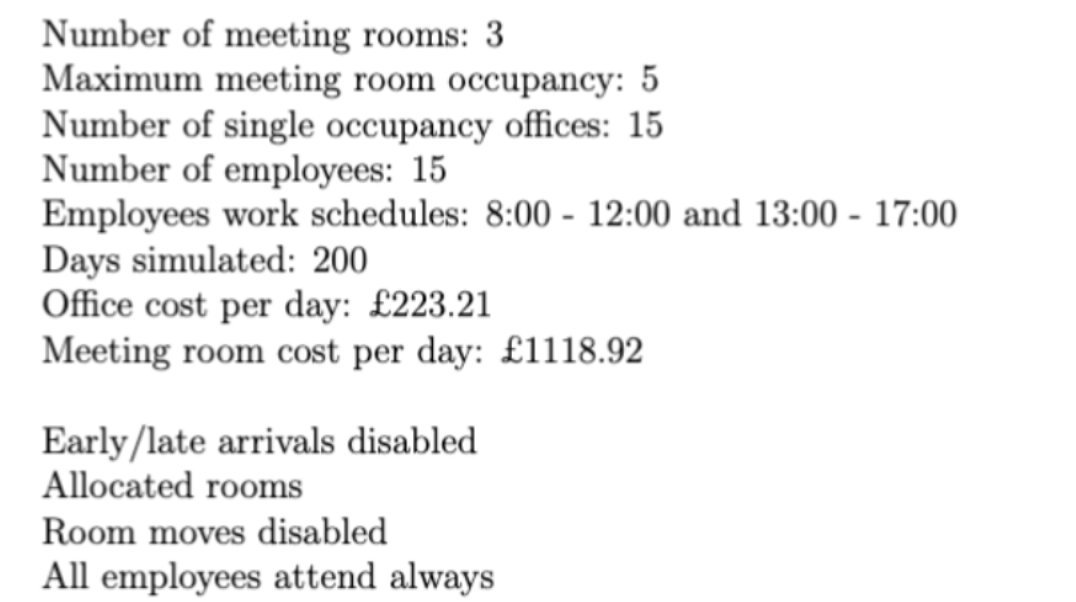

In [ ]:
from ScheduleManager_cancel import ScheduleManager
from PMF import PMF
from Event import Event
from Employee import Employee
from Room import Room
from datetime import datetime
import json

days = 100
all_cancelled = []  # Used to collect data on meeting cancellations for all simulated days
daily_cancel_rates = []  

for i in range(1, days + 1):
    meeting_durations_PMF = PMF([30, 60, 90, 120], [0.2, 0.6, 0.1, 0.1])
    number_of_employees_PMF = PMF([2, 3, 4, 5], [0.5, 0.15, 0.05, 0.3])
    number_of_meetings_PMF = PMF([2, 3, 4, 5], [0.25, 0.25, 0.25, 0.25])

    number_of_offices = 15
    number_of_meeting_rooms = 3
    print(f"Day {i} - Offices: {number_of_offices}, Meeting Rooms: {number_of_meeting_rooms}")

    # Room availability
    start_time = datetime(2010, 1, 1, 8, 0, 0)
    end_time = datetime(2010, 1, 1, 17, 0, 0)
    room_use = Event(start_time, end_time, "Room is available for use", None, None)

    # Offices
    office_room_list = []
    for office_number in range(number_of_offices):
        office = Room("Office", f"00{office_number}", 2.34520787991, 2, 0.1, 0, 1,
                      meeting_durations_PMF, number_of_employees_PMF, number_of_meetings_PMF)
        office.working_schedule.add_event(room_use)
        office_room_list.append(office)

    # Meeting rooms
    meeting_rooms_list = []
    for meeting_room_number in range(number_of_meeting_rooms):
        room = Room("Meeting room", f"10{meeting_room_number}", 2.34520787991 * 5, 2, 0.1, 5, 0,
                    meeting_durations_PMF, number_of_employees_PMF, number_of_meetings_PMF)
        room.working_schedule.add_event(room_use)
        meeting_rooms_list.append(room)

    # Employee schedules
    morning = Event(datetime(2010, 1, 1, 8, 0, 0), datetime(2010, 1, 1, 12, 0, 0), "Morning", None, None)
    afternoon = Event(datetime(2010, 1, 1, 13, 0, 0), datetime(2010, 1, 1, 17, 0, 0), "Afternoon", None, None)

    number_of_employees = 15
    print("Number of employees:", number_of_employees)
    employees_list = []
    for employee_number in range(number_of_employees):
        emp = Employee(f"000{employee_number}", "Worker", office_room_list[employee_number])
        emp.add_work_event(morning)
        emp.add_work_event(afternoon)
        employees_list.append(emp)

    # Setup schedule manager
    my_scheduler = ScheduleManager(office_room_list, meeting_rooms_list, employees_list)
    cancelled_info = my_scheduler.setup(
        filepath + 'Meeting_Room_with_Cancellation{i}.csv',
        filepath + 'Timetable{i}.csv',
        simulation_day_index=i
    )

    all_cancelled.append(cancelled_info)  # Collect cancellation information for the current day
    daily_cancel_rates.append(my_scheduler.cancel_rate_summary["overall_rate"])
    

# Write json file with the cancellation information
output_path = filepath + "cancelled_meetings.json"
with open(output_path, "w") as f:
    json.dump(all_cancelled, f, indent=2)